In [1]:
import os, sys
sys.path.insert(0, os.path.abspath(os.path.join("..", "..")))

# Reload the naive predictions

Shows how to make use of the data produced from the `scripted` script `naive.py`.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.collections
import descartes
import open_cp.scripted
import open_cp.plot

In [3]:
loaded = open_cp.scripted.Loader("naive_preds.pic.xz")

In [4]:
loaded.timed_points.time_range

(numpy.datetime64('2016-01-02T13:00:00.000'),
 numpy.datetime64('2017-08-09T09:00:00.000'))

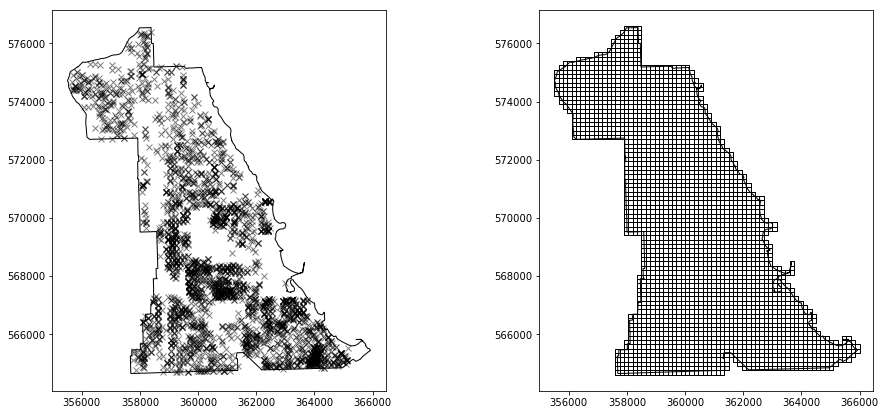

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(16,7))

for ax in axes:
    p = descartes.PolygonPatch(loaded.geometry, fc="none", ec="black")
    ax.add_patch(p)
    ax.set_aspect(1)

axes[0].scatter(*loaded.timed_points.coords, marker="x", linewidth=1, color="black", alpha=0.5)
    
pc = matplotlib.collections.PatchCollection(open_cp.plot.patches_from_grid(loaded.grid),
    facecolors="none", edgecolors="black")
axes[1].add_collection(pc)

axes[1].set(xlim = axes[0].get_xlim())
axes[1].set(ylim = axes[0].get_ylim())
None

In [6]:
next(iter(loaded))

LoadedPrediction(predictor_class=NaiveProvider (CountingGridKernel), time=datetime.datetime(2016, 10, 1, 0, 0), prediction=GridPredictionArray(offset=(355500,564600), size=150x150, risk intensity size=70x80))

In [7]:
times = [x[1] for x in loaded]
preds = [x[2] for x in loaded]

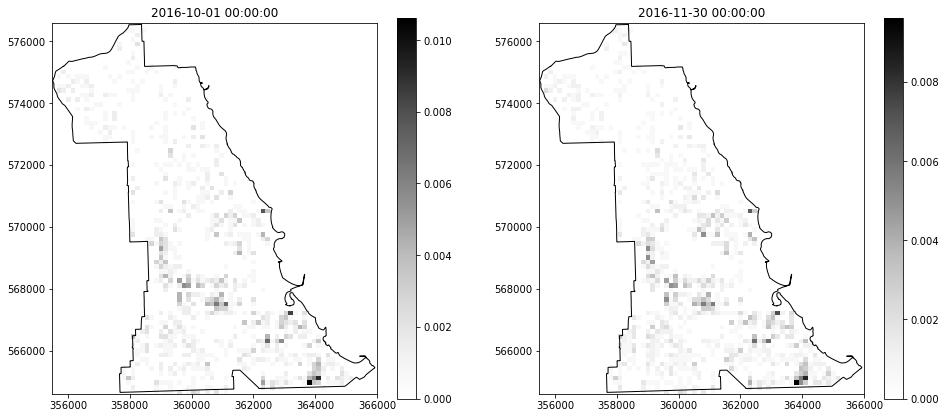

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(16,7))
for ax in axes:
    p = descartes.PolygonPatch(loaded.geometry, fc="none", ec="black")
    ax.add_patch(p)
    ax.set_aspect(1)
for ax, i in zip(axes, [0, 60]):
    pred = preds[i]
    m = ax.pcolor(*pred.mesh_data(), pred.intensity_matrix, cmap="Greys")
    plt.colorbar(m, ax=ax)
    ax.set_title(times[i])

# Manually redo the predictions and scoring

In [9]:
import datetime
import open_cp.naive
import numpy as np
import pandas as pd
import open_cp.evaluation

In [10]:
start = datetime.datetime(2016, 10, 1)
our_preds = []
while start < datetime.datetime(2017, 1, 1):
    predictor = open_cp.naive.CountingGridKernel(loaded.grid.xsize, region=loaded.grid.region())
    mask = loaded.timed_points.timestamps < start
    predictor.data = loaded.timed_points[mask]
    pred = predictor.predict()

    pred.mask_with(loaded.grid)
    pred = pred.renormalise()
    
    our_preds.append(pred)
    start += datetime.timedelta(days=1)

In [14]:
for i in range(len(our_preds)):
    np.testing.assert_allclose(our_preds[i].intensity_matrix, preds[i].intensity_matrix)

### Check the scoring

In [15]:
frame = pd.read_csv("naive.csv")
frame.head()

,Predictor,Start time,End time,1%,2%,3%,4%,5%,6%,7%,...,91%,92%,93%,94%,95%,96%,97%,98%,99%,100%
0,NaiveProvider (CountingGridKernel),2016-10-01 00:00:00,2016-10-02 00:00:00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,NaiveProvider (CountingGridKernel),2016-10-02 00:00:00,2016-10-03 00:00:00,0.0,0.00,0.500000,0.500000,0.500000,0.500000,0.500000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,NaiveProvider (CountingGridKernel),2016-10-03 00:00:00,2016-10-04 00:00:00,0.0,0.25,0.250000,0.250000,0.250000,0.250000,0.250000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,NaiveProvider (CountingGridKernel),2016-10-04 00:00:00,2016-10-05 00:00:00,0.0,0.00,0.142857,0.142857,0.142857,0.142857,0.142857,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,NaiveProvider (CountingGridKernel),2016-10-05 00:00:00,2016-10-06 00:00:00,0.2,0.20,0.500000,0.500000,0.600000,0.600000,0.600000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [16]:
frame.tail()

,Predictor,Start time,End time,1%,2%,3%,4%,5%,6%,7%,...,91%,92%,93%,94%,95%,96%,97%,98%,99%,100%
179,NaiveProvider (ScipyKDE),2016-12-27 00:00:00,2016-12-28 00:00:00,0.0,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
180,NaiveProvider (ScipyKDE),2016-12-28 00:00:00,2016-12-29 00:00:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
181,NaiveProvider (ScipyKDE),2016-12-29 00:00:00,2016-12-30 00:00:00,0.0,0.142857,0.285714,0.285714,0.285714,0.285714,0.285714,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
182,NaiveProvider (ScipyKDE),2016-12-30 00:00:00,2016-12-31 00:00:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
183,NaiveProvider (ScipyKDE),2016-12-31 00:00:00,2017-01-01 00:00:00,0.0,0.000000,0.142857,0.142857,0.142857,0.285714,0.428571,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [17]:
coverages = list(range(1,101))

start = datetime.datetime(2016, 10, 1)
rows = []
for pred in our_preds:
    end = start + datetime.timedelta(days=1)
    mask = (loaded.timed_points.timestamps >= start) & (loaded.timed_points.timestamps < end)
    rows.append(open_cp.evaluation.hit_rates(pred, loaded.timed_points[mask], coverages))
    start = end

In [19]:
for i in range(len(rows)):
    np.testing.assert_allclose(frame.ix[i][3:].values.astype(np.float), list(rows[i].values()))